# Added 30% of duplicates

In [1]:
import sys
import os 
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import sanity_checks_methods
import pandas as pd
import ML_algorithms
from sklearn.metrics import classification_report

# Return to previous directory
os.chdir('..')

df = pd.read_csv('dataset/stroke_data.csv')

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])
df_original = df.copy()
df_original.dropna(axis=0,inplace=True)
df_original = df_original[df_original['age'] >= 0]


df.dropna(axis=0, inplace=True)
df = df[df['age'] >= 0]

sanity_checks_methods.drop_negative_age(df)

## Adding duplicates

In [2]:
print('--------------------------------------')
sanity_checks_methods.print_duplicates_values(df) 

print(f'\nADDING 30% TO FEATURE \n')

df_dirty = sanity_checks_methods.duplicates_values(df, 30)
sanity_checks_methods.print_duplicates_values(df_dirty)

--------------------------------------
Number of rows:  9984
Duplicate Counts:  0
Percentage of Duplicate Values:  0.0

ADDING 30% TO FEATURE 

Number of rows:  12979
Duplicate Counts:  2995
Percentage of Duplicate Values:  23.075737730179522


## Decision Tree

Classification Report on Training Set:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      4547
           1       0.97      1.00      0.98      4538

    accuracy                           0.98      9085
   macro avg       0.98      0.98      0.98      9085
weighted avg       0.98      0.98      0.98      9085

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1950
           1       0.95      0.99      0.97      1944

    accuracy                           0.97      3894
   macro avg       0.97      0.97      0.97      3894
weighted avg       0.97      0.97      0.97      3894

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      4999
           1       0.96      1.00      0.98      4985

    accuracy                           0.98      9984


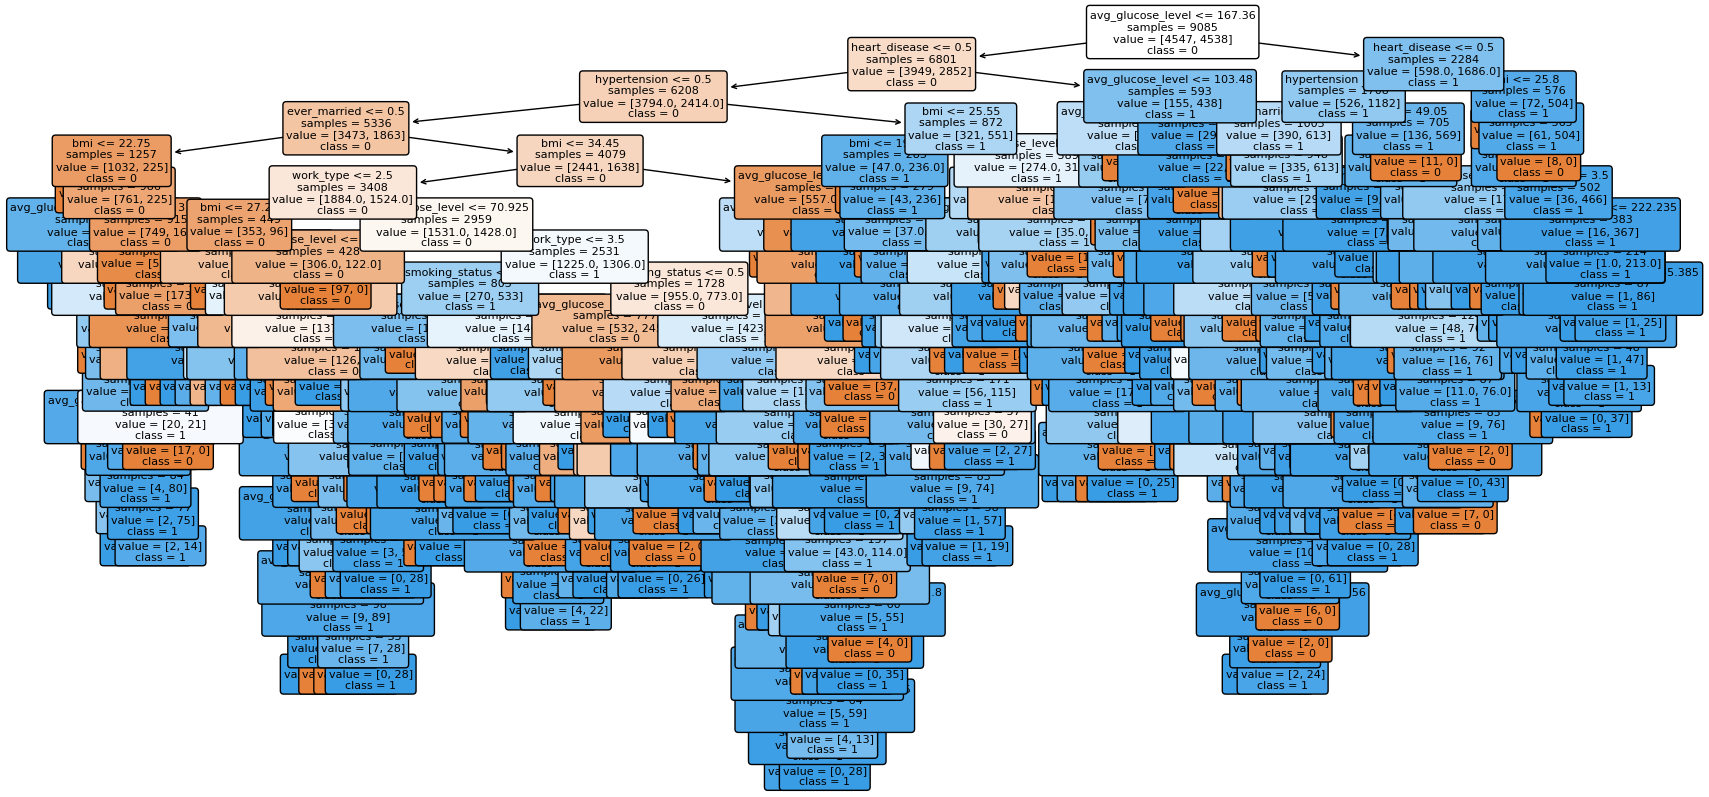

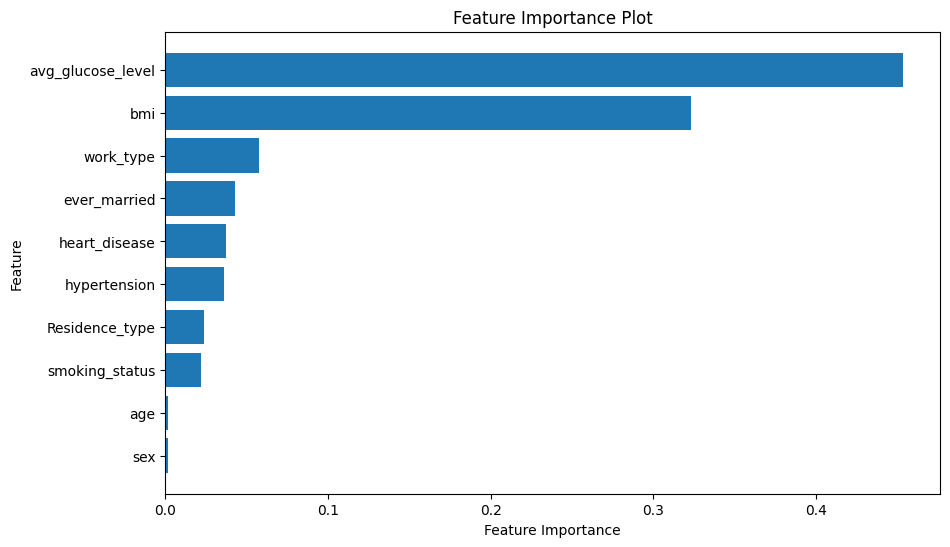

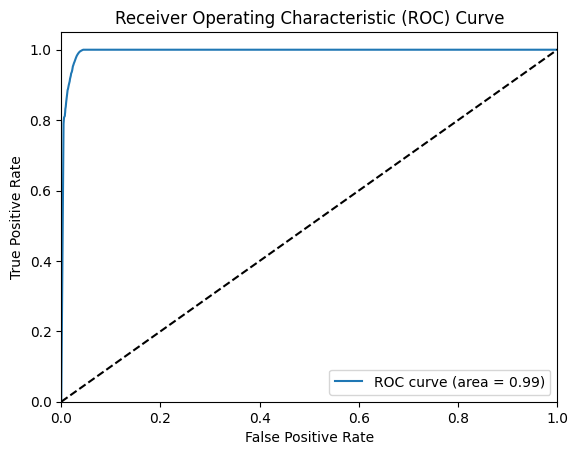

AUC Score: 0.9946866203732221


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.9614961496149615, 0.9427942794279428, 0.9625962596259626, 0.9647964796479648, 0.966996699669967, 0.9581497797356828, 0.9669603524229075, 0.9570484581497798, 0.9658590308370044, 0.9691629955947136]
Mean accuracy: 0.9615860484726886
95% confidence interval: (0.9560928892670874, 0.9670792076782898)


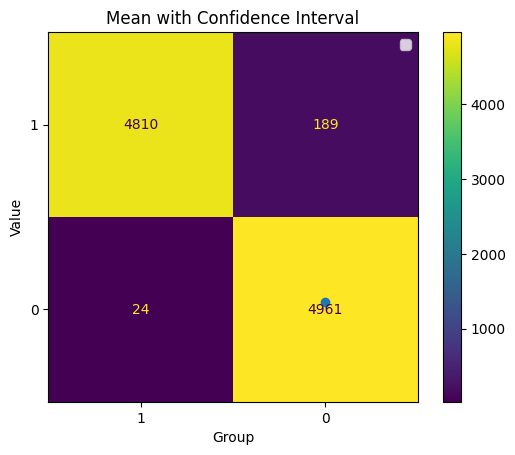

In [3]:
decision_tree = ML_algorithms.train_decision_tree_model(df_dirty, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_dirty)


## Hist Gradient Boosting Classifier

Fitting 5 folds for each of 50 candidates, totalling 250 fits
search time: 36.21989393234253
Best parameters found:  {'l2_regularization': 0.1, 'learning_rate': 0.2, 'max_depth': 7, 'max_iter': 197, 'min_samples_leaf': 2}
Best score on training data:  1.0
Classification Report on Training Set - dirty:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4547
           1       1.00      1.00      1.00      4538

    accuracy                           1.00      9085
   macro avg       1.00      1.00      1.00      9085
weighted avg       1.00      1.00      1.00      9085

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1950
           1       0.99      1.00      0.99      1944

    accuracy                           0.99      3894
   macro avg       0.99      0.99      0.99      3894
weighted avg       0.99      0.99      0.99      3894



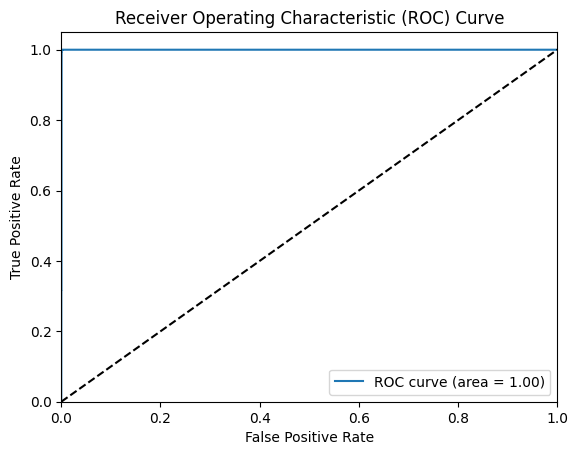

AUC Score: 0.9996539729209634


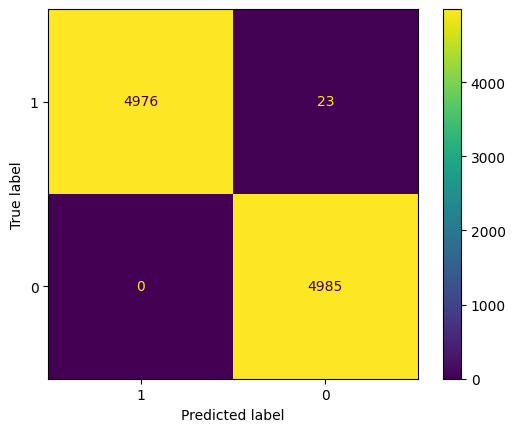

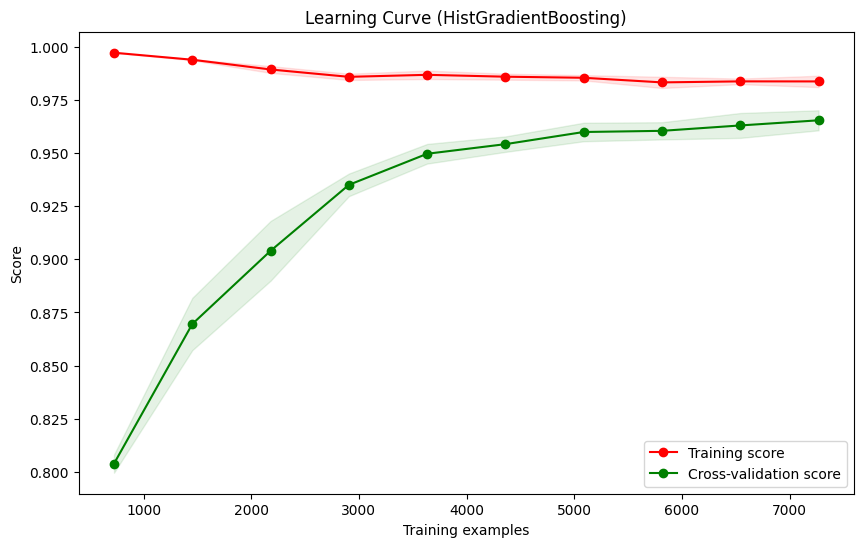

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.9911991199119912, 0.9966996699669967, 0.9911991199119912, 0.9955995599559956, 0.9933993399339934, 0.9900881057268722, 0.9933920704845814, 0.9933920704845814, 0.9944933920704846, 0.9944933920704846]
Mean accuracy: 0.9933955840517973
95% confidence interval: (0.9919107857868162, 0.9948803823167783)


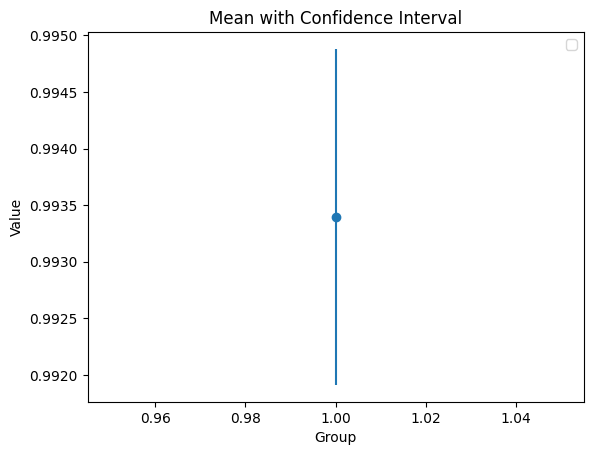

--------------------------------------


In [4]:
hgb = ML_algorithms.train_hist_gradient_boosting_model(df_dirty, df_original)
ML_algorithms.k_fold_cross_validation_dt(hgb, df_dirty)

print('--------------------------------------')